In [1]:
#imporing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
toyota=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [4]:
#reading data
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# Performing EDA Transformations

In [5]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
columns=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]

toyota2=toyota[columns]

In [7]:
toyota2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
#Renaming columns
toyota3=toyota2.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)
toyota3

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
#checking for duplicated rows
toyota3[toyota3.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
toyota4=toyota3.drop_duplicates().reset_index(drop=True)


In [11]:
toyota4

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [12]:
#checking correlation for dataset
toyota4.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


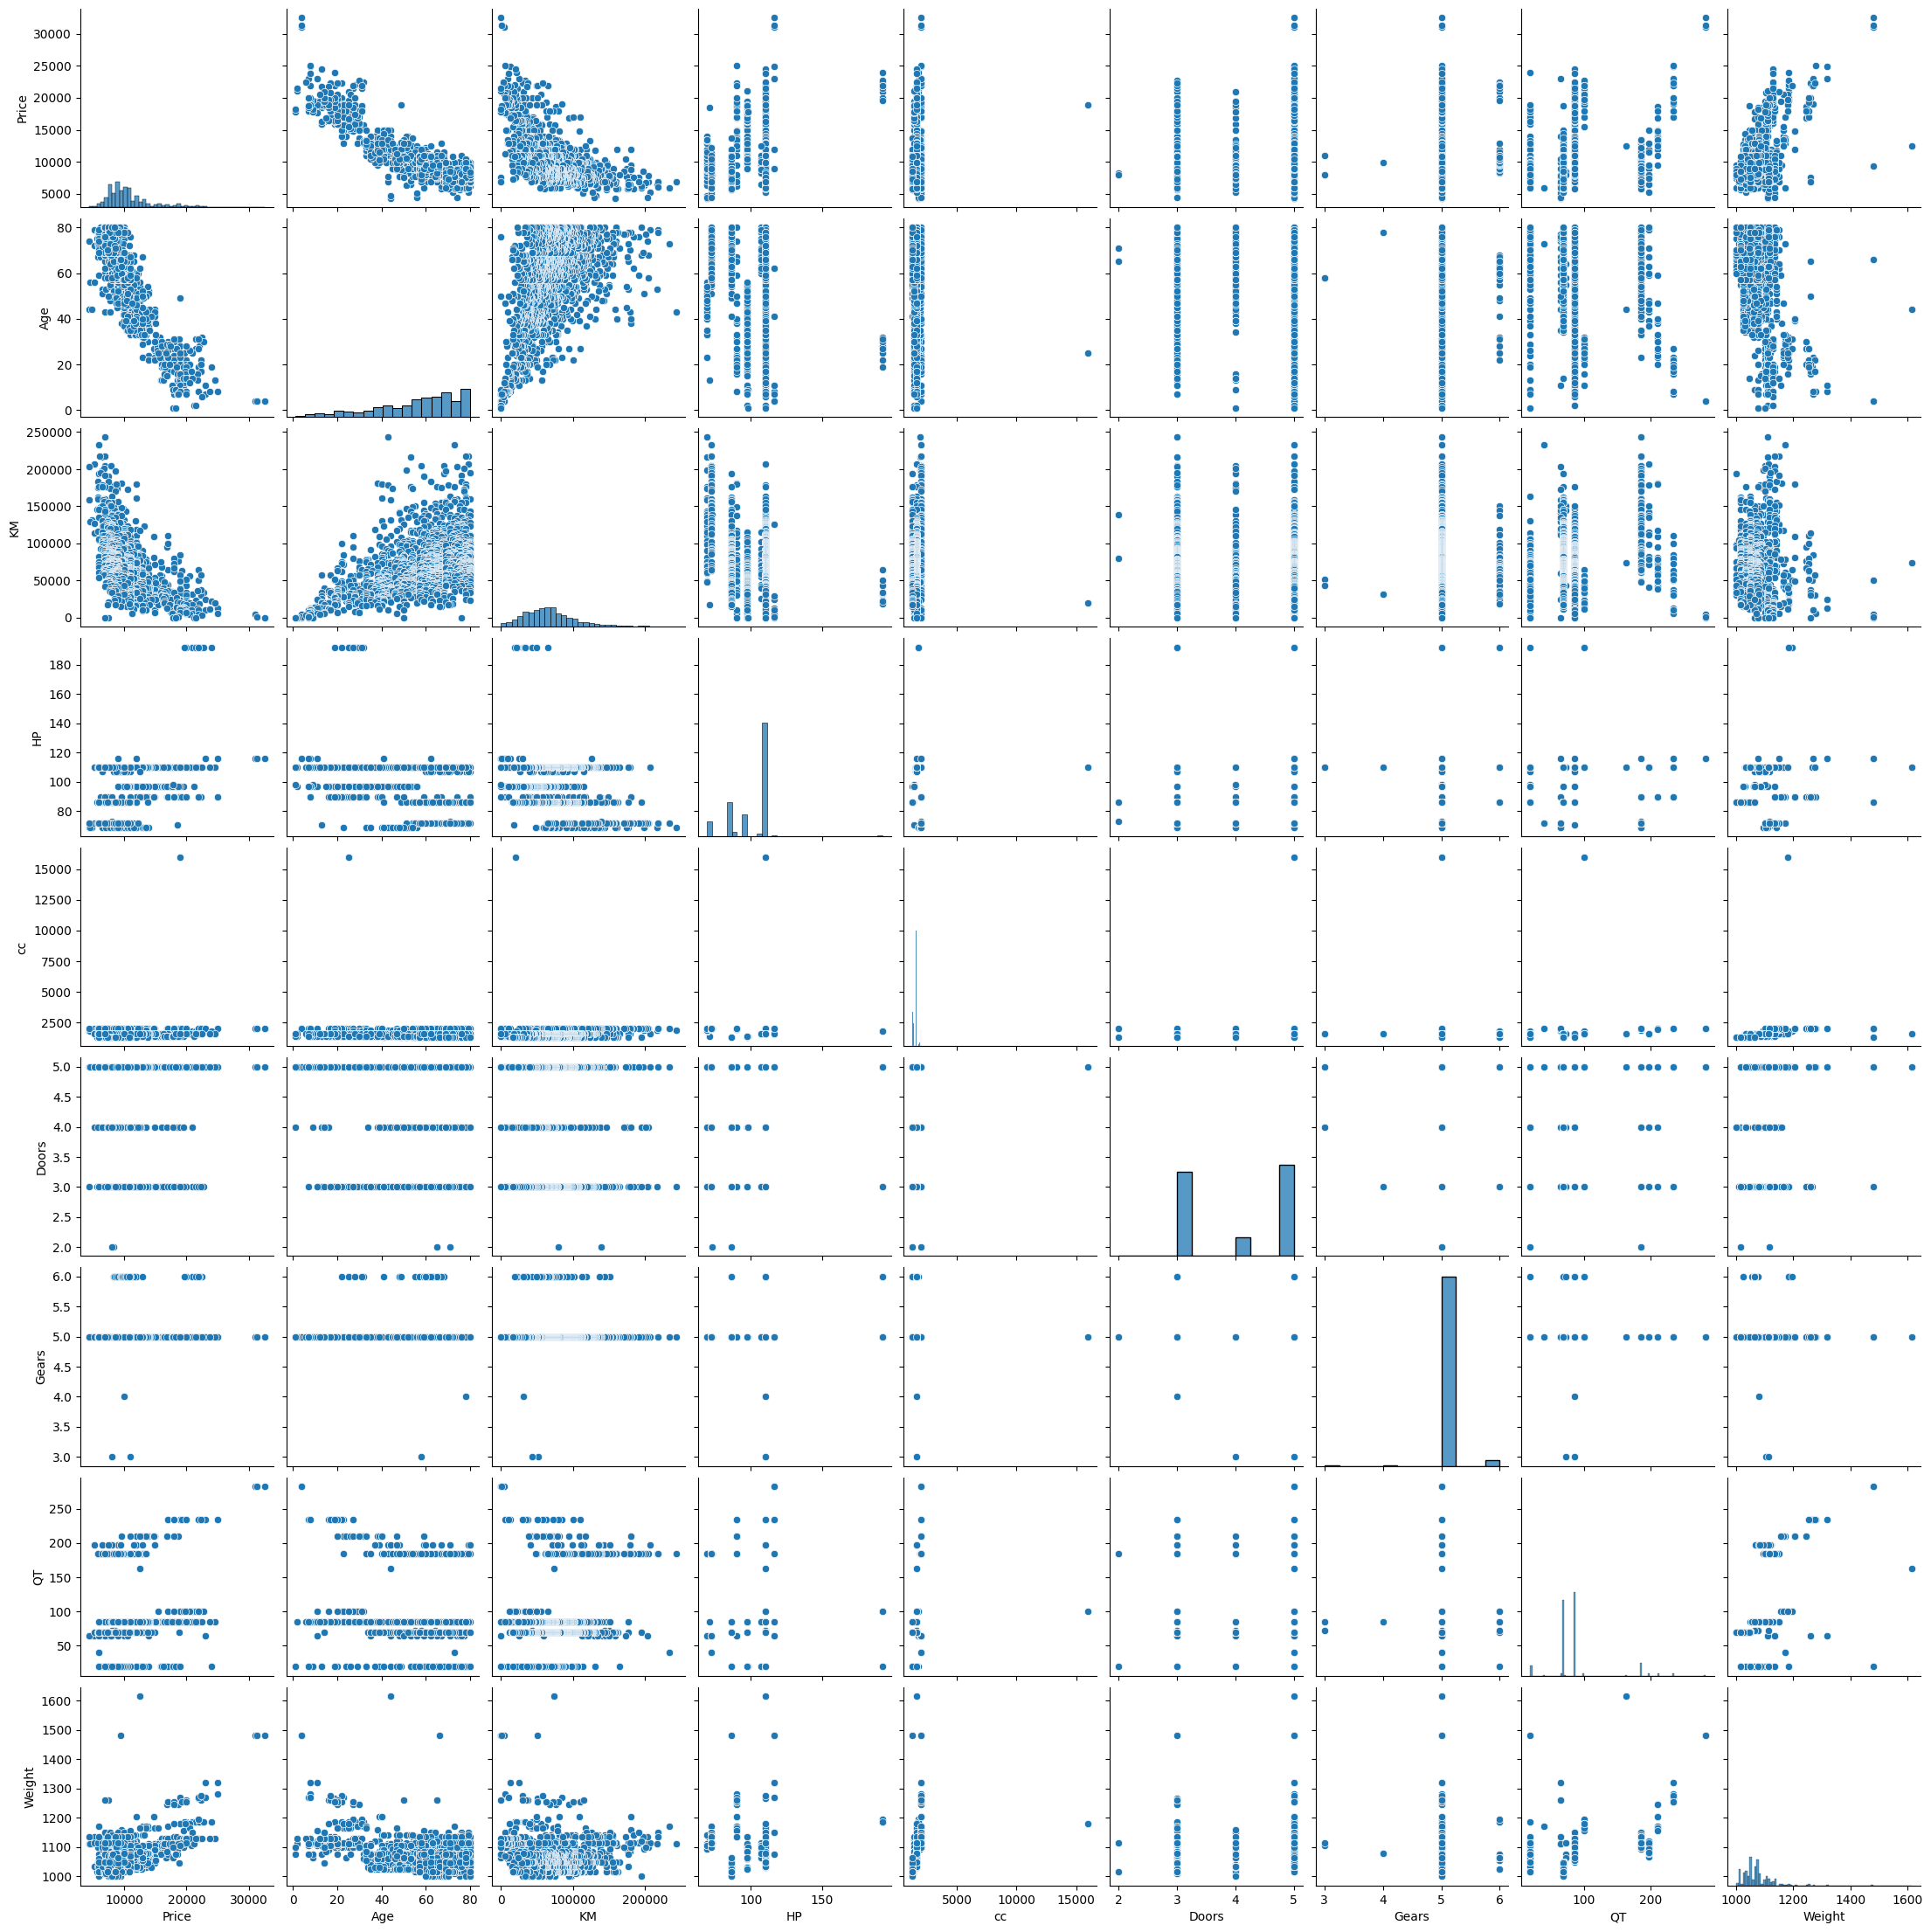

In [13]:
#plotting pairplots
sns.pairplot(toyota4)

<Axes: >

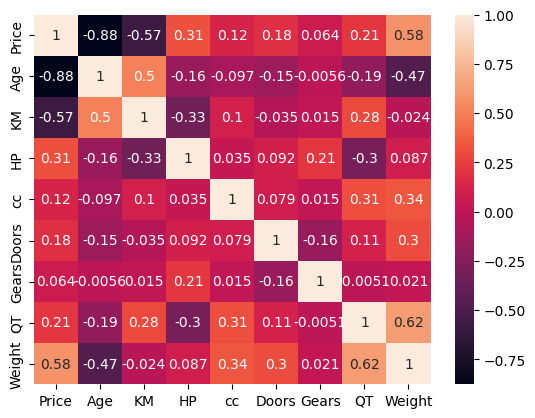

In [14]:
#plotting heatmap
sns.heatmap(toyota4.corr(),annot=True)

# Model Building

In [15]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota4).fit()

In [16]:
#Finding Coefficients
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [17]:
#Calculating tvalues and pvalues
model.tvalues,model.pvalues

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 cc           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 cc            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 Weight        1.031118e-51
 dtype: float64)

In [18]:
#rounding pvalues
np.round(model.pvalues,5)

Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
cc           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64

In [19]:
#calculating rsquared values
model.rsquared

0.8625200256947001

since,when we compare the pvalues in the dataset there is a huge values and
are greater than 0.05 values for p.so,we build model for those variables.

In [20]:
#fitting regression moddels
#simple linear regrssion for cc
slr_c=smf.ols('Price~cc',data=toyota4).fit()
slr_c.tvalues,slr_c.pvalues

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [21]:
#simple linear regression for doors
slr_d=smf.ols('Price~Doors',data=toyota4).fit()
slr_d.tvalues,slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [22]:
#multiple linear regression for doors and cc
mlr_cd=smf.ols('Price~cc+Doors',data=toyota4).fit()
mlr_cd.tvalues,mlr_cd.pvalues

(Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

We can clearly observe that after fitting simple linear regression for cc,doors and multiple regression for both,have a significant value.so we move to validation techniques

# Model Validation Techniques

In [23]:
#model validation is done in 2 steps
#1.collinearity check by calculating vif for all independent variables
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=toyota4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=toyota4).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~Age+KM+cc+Doors+Gears+QT+Weight',data=toyota4).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('cc~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota4).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('Doors~Age+KM+HP+cc+Gears+QT+Weight',data=toyota4).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('Gears~Age+KM+HP+cc+Doors+QT+Weight',data=toyota4).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_qt=smf.ols('QT~Age+KM+HP+cc+Doors+Gears+Weight',data=toyota4).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_weight=smf.ols('Weight~Age+KM+HP+cc+Gears+QT',data=toyota4).fit().rsquared
vif_weight=1/(1-rsq_weight)


#storing the values of vif in the form of dataframe

d1={'variables':['Age','Weight','KM','HP','cc','Gears','QT'],'VIF':[vif_age,vif_weight,vif_km,vif_hp,vif_cc,vif_gears,vif_qt]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,VIF
0,Age,1.876236
1,Weight,2.330026
2,KM,1.757178
3,HP,1.419180
4,cc,1.163470
5,Gears,1.098843
6,QT,2.295375


From the above table we can clearly say that the variables have no collinearity between the variables and no value of vif>20 so we consider all the variables in regression equation.


# 2. Residual Analysis

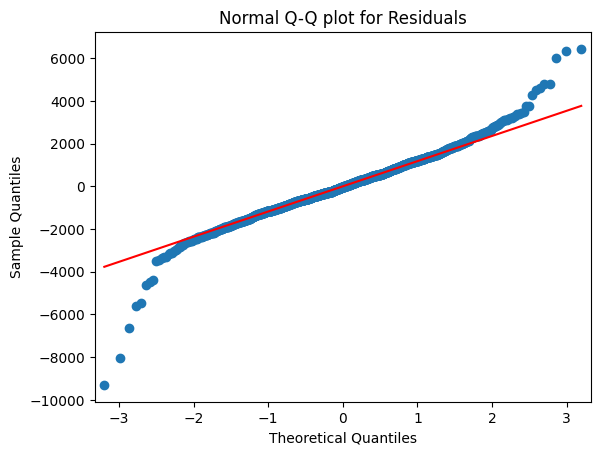

In [24]:
# Q-Q plot

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot for Residuals")
plt.show()

In [25]:
# Checking For Outliers
list(np.where(model.resid>6000))


[array([109, 146, 522])]

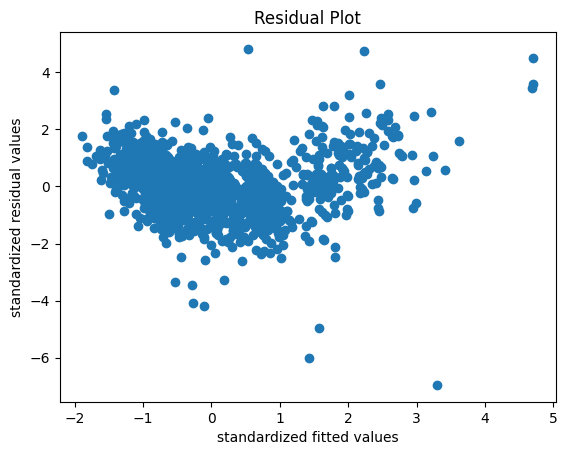

In [26]:
#Residual plot For Homoscadasticity
def get_standardized_values(vals):return(vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("standardized fitted values")
plt.ylabel("standardized residual values")
plt.show()

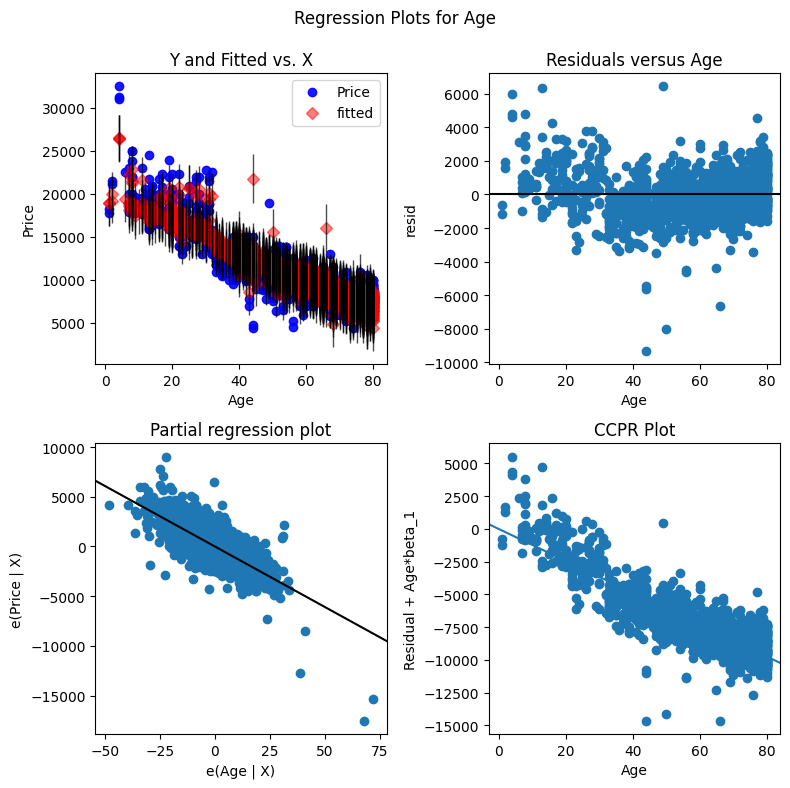

In [27]:
# Residual versus Regressors plots
#for age
fig=plt.figure(figsize=(8,8))
fig=sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

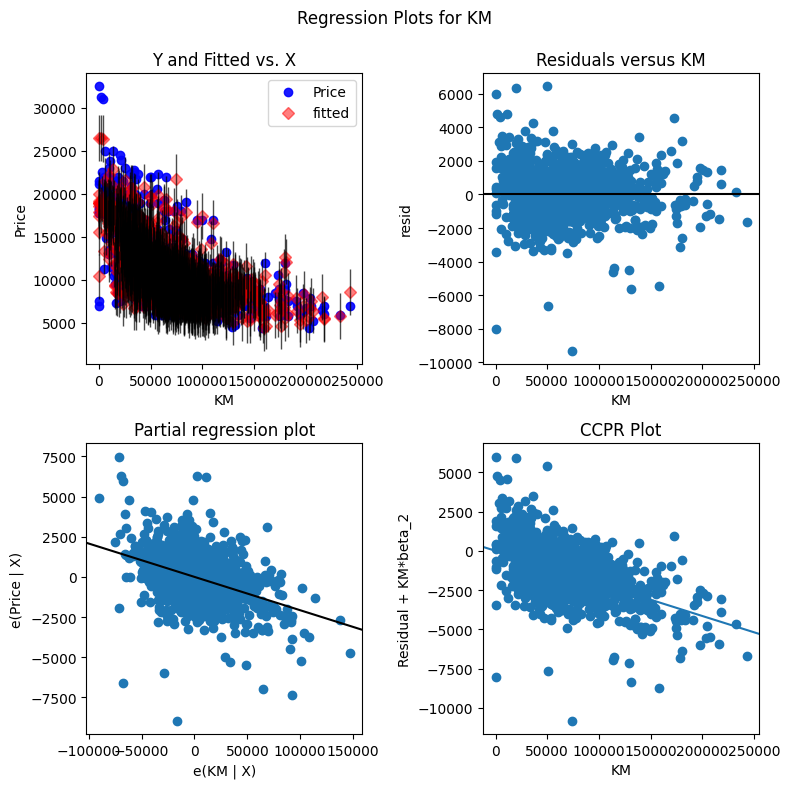

In [28]:
# For KM
fig=plt.figure(figsize=(8,8))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

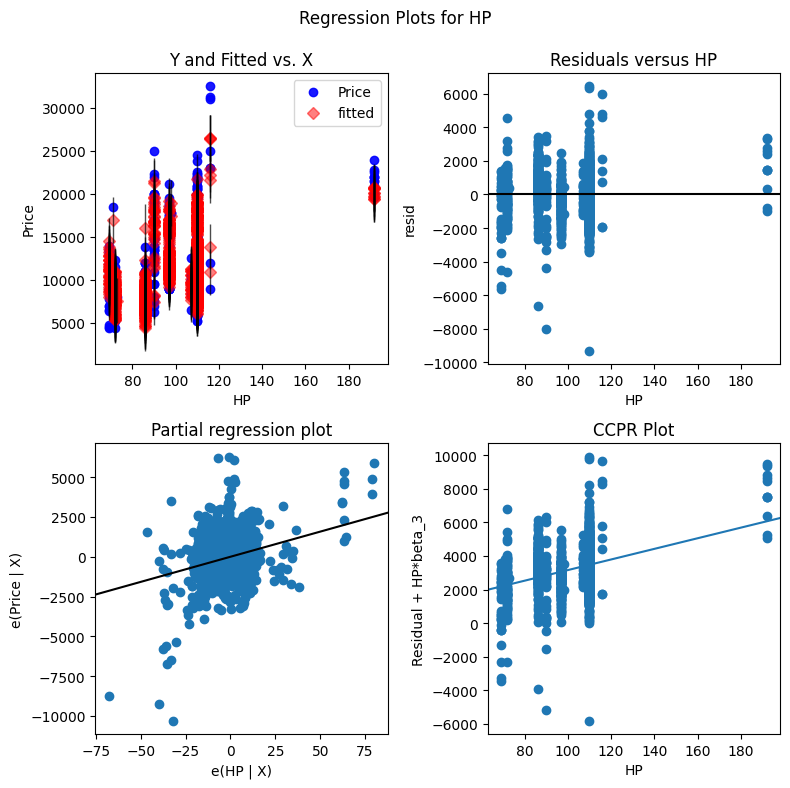

In [29]:
#For HP
fig=plt.figure(figsize=(8,8))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

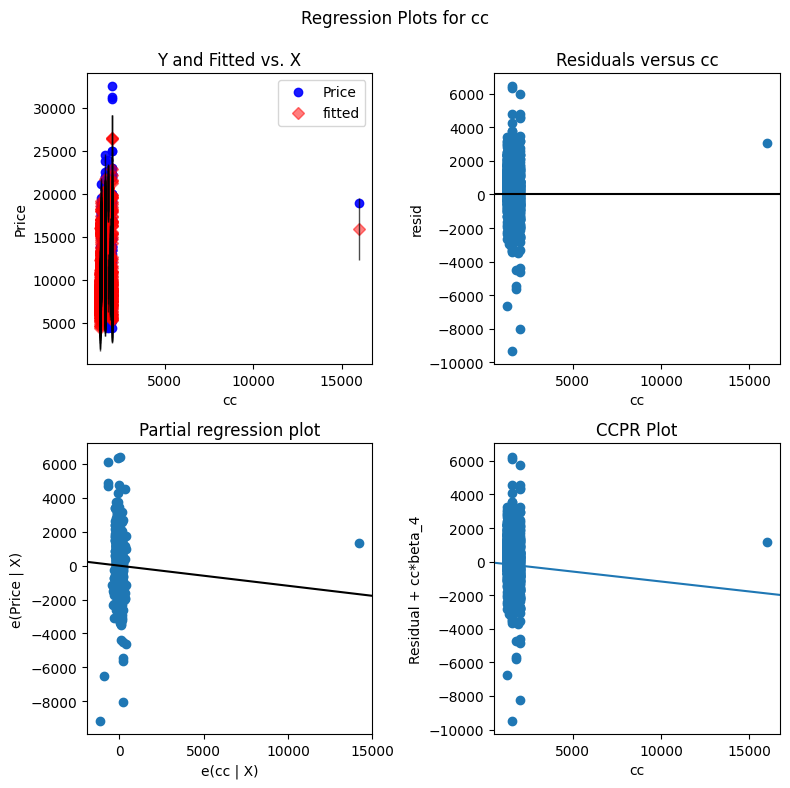

In [30]:
#For cc
fig=plt.figure(figsize=(8,8))
fig=sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

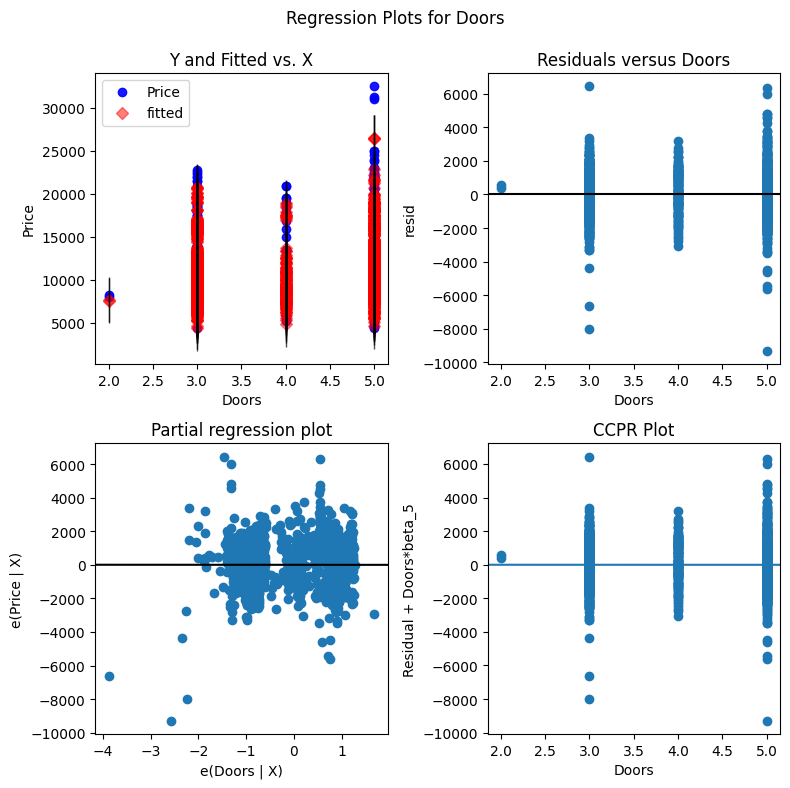

In [31]:
#For Doors
fig=plt.figure(figsize=(8,8))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

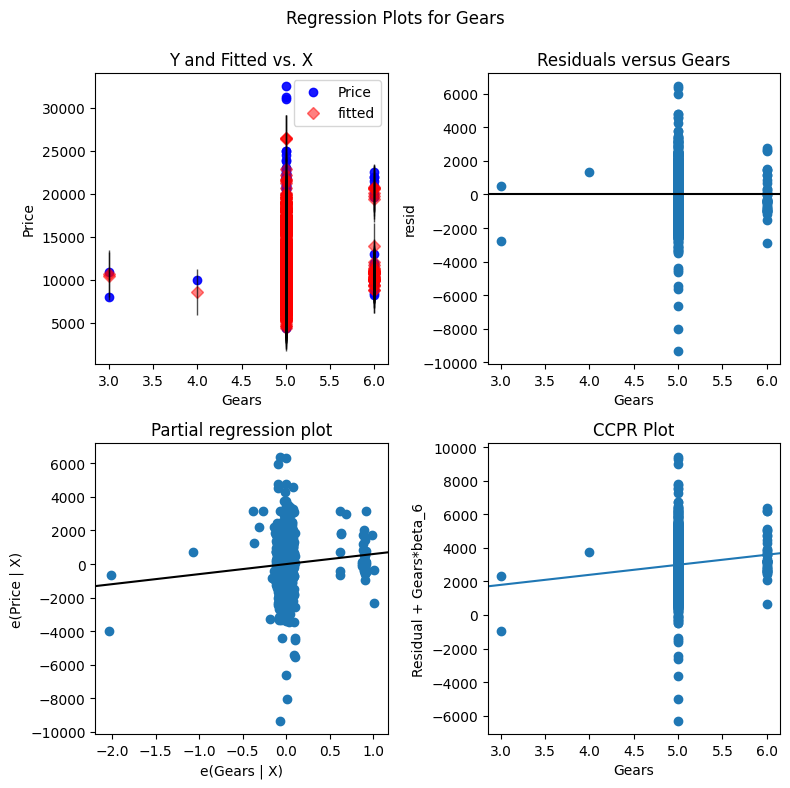

In [32]:
#For gears
fig=plt.figure(figsize=(8,8))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

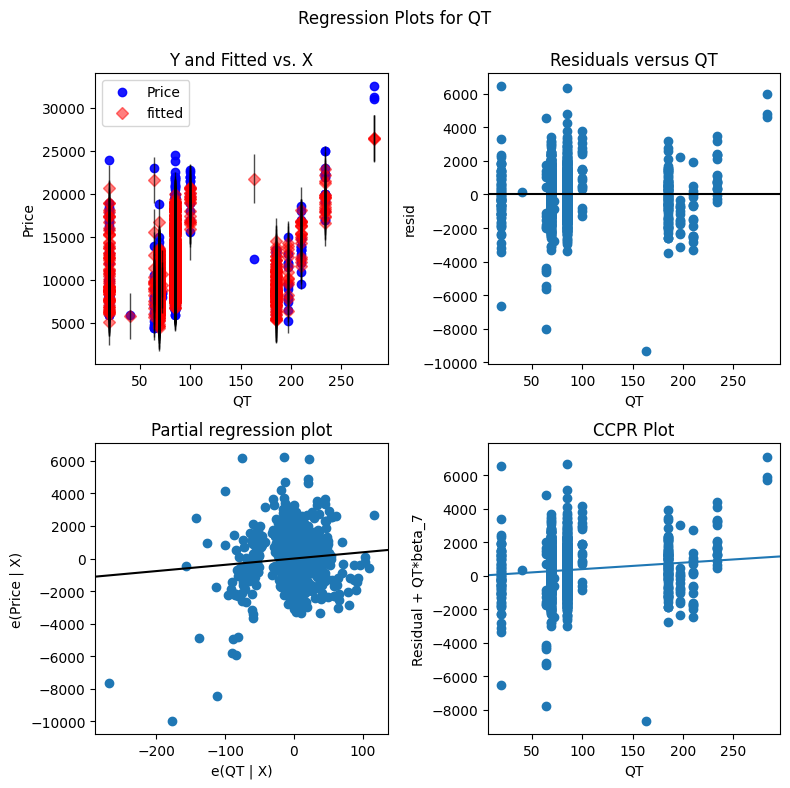

In [33]:
# for qt
fig=plt.figure(figsize=(8,8))
fig=sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

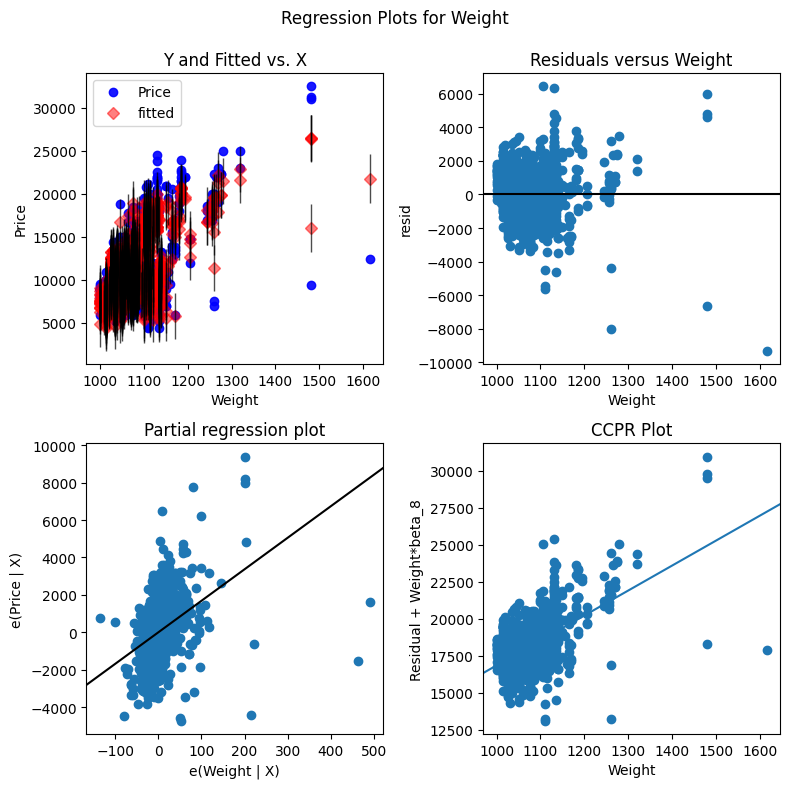

In [34]:
#for weight
fig=plt.figure(figsize=(8,8))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics

In [35]:
#1. cook's distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

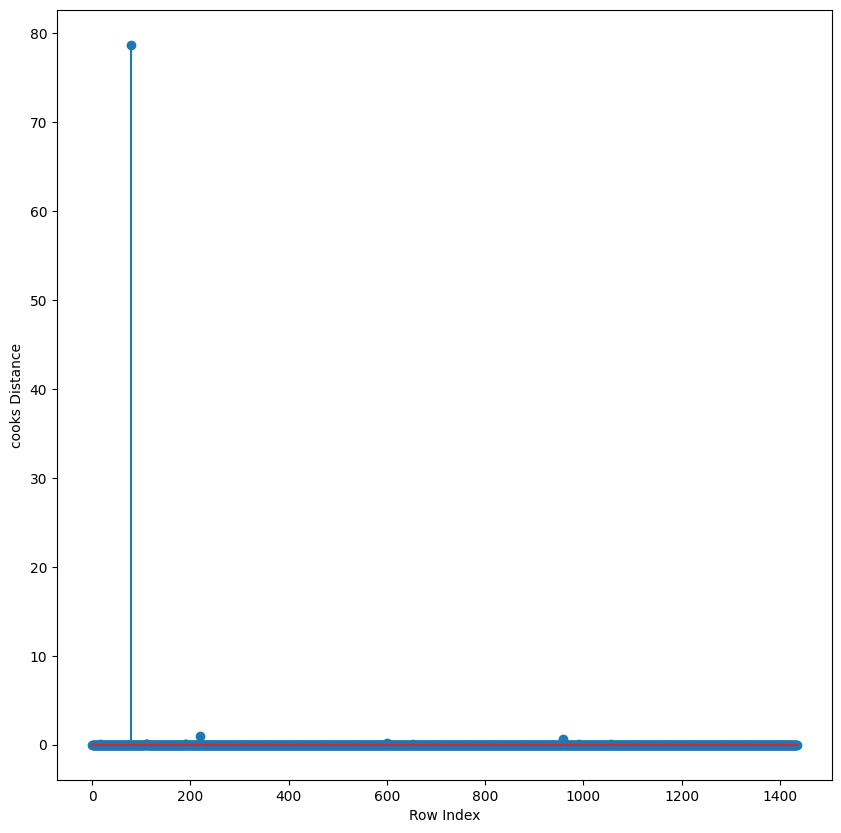

In [36]:
#Stem plot
fig=plt.subplots(figsize=(10,10))
plt.stem(np.arange(len(toyota4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('cooks Distance')
plt.show()

In [37]:
#checking outlier
np.argmax(c),np.max(c)

(80, 78.72950582258932)

In [39]:
#calculating leverage value
k=toyota4.shape[1]
n=toyota4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

From the above graph it is clear that those points which are beyond
leverage cutoff are outliers

<Figure size 500x500 with 0 Axes>

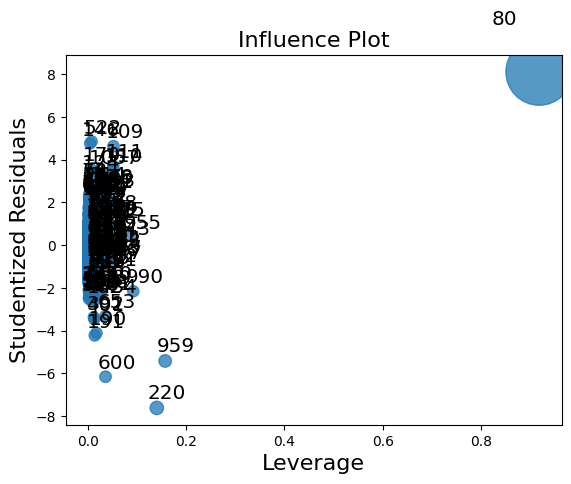

In [42]:
# influence plot
plt.figure(figsize=(5,5))
influence_plot(model,alpha=0.05)
plt.show()

In [43]:
#checking the index of outliers
toyota4[toyota4.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Improving Model

In [45]:
# Removing the influencers and resetting index
toyota5=toyota4.drop(toyota4.index[80],axis=0).reset_index(drop=True)
toyota5

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## Final Model

In [66]:
final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota5).fit()
final_model.rsquared , final_model.aic


(0.9002856358035559, 21930.304113552098)

In [67]:
toyota5

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,16900,27,94612,90,2000,3,5,210,1245
4,18600,30,75889,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1316,8450,80,23000,86,1300,3,5,69,1015
1317,7500,69,20544,86,1300,3,5,69,1025
1318,10845,72,19000,86,1300,3,5,69,1015
1319,8500,71,17016,86,1300,3,5,69,1015


## Model Predictions

In [68]:
new_data=pd.DataFrame({'Age':55,'KM':927000,'HP':71,'cc':1100,'Doors':5,'Gears':4,'QT':110,'Weight':1200},index=[1])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,Weight
1,55,927000,71,1100,5,4,110,1200


In [69]:
final_model.predict(new_data)

1    2665.408072
dtype: float64

In [70]:
# predicting new data
pred_y=final_model.predict(toyota5)
pred_y

0       15422.647051
1       15478.284310
2       15374.790125
3       17625.545786
4       17586.145999
            ...     
1316     7596.360485
1317     9199.429509
1318     8526.202537
1319     8665.129120
1320     8775.241768
Length: 1321, dtype: float64

# Interview Question

## 1. What is Normalization & Standardization and how is it helpful?

## Normalization :

Scales data to specific range i.e. 0 and 1. And often used when data distribution is unknown or non-gaussian.

#### Formula :

Normalized Value = (Value - Min Value) / (Max Value - Min Value)

#### When to use :

- Features have different scales but a fixed range is desired.

- Distance-based algorithms like K-Nearest Neighbors (KNN), where features must be on the same scale for accurate distance calculations.



2. What techniques can be used to address multicollinearity in multiple linear regression?

## Standardization :

Standardization scales data to have a mean of 0 and a standard deviation of 1. It's often used when the data distribution is assumed to be Gaussian.

#### Formula :

Standardized Value = (Value - Mean) / Standard Deviation


#### When to use :

- Data distribution is assumed to be Gaussian.

- In gradient-based algorithms like Support Vector Machines (SVM) and neural networks, where features with similar scales can improve training efficiency.

- In dimensionality reduction techniques like Principal Component Analysis (PCA), where maintaining the correct feature variance is important.




#### How are they helpful ?

Normalization scales data to a specific range (usually 0-1), making features comparable, especially useful for distance-based algorithms like KNN.

Standardization scales data to have a mean of 0 and a standard deviation of 1, improving the performance of gradient-based algorithms like SVM and neural networks.

# 2. What techniques can be used to address multicollinearity in multiple linear regression? 

Multicollinearity, a statistical phenomenon where independent variables in a regression model are highly correlated, can significantly impact the reliability and interpretability of model results.

### Visual Approach 

1. Correlation Matrix:

A correlation matrix is a table showing correlation coefficients between variables.

- Visual Representation: A heatmap provides a clear visual representation of these correlations.

- Interpretation: High correlation coefficients (close to 1 or -1) indicate potential multicollinearity.

2. Variance Inflation Factor (VIF):

VIF measures the extent to which the variance of a regression coefficient is inflated due to multicollinearity.

- Visual Representation: A bar plot can be used to visualize VIF values for each variable.

- Interpretation: High VIF values (typically above 5 or 10) indicate severe multicollinearity.

### Calculation Approach

Addressing Multicollinearity:

1. Feature Selection:

- Remove Correlated Variables: Identify and remove one of the highly correlated variables.

- Principal Component Analysis (PCA): Combine correlated variables into fewer uncorrelated components.

2. Regularization:

- Ridge Regression: Adds a penalty term to the loss function to shrink coefficient estimates, reducing the impact of multicollinearity.

- Lasso Regression: Similar to Ridge Regression, but can set some coefficients to zero, effectively performing feature selection.

3. Centering the Data:

Subtracting the mean from each variable can sometimes reduce correlation.